# CNNs, Keras API and Regression

In [1]:
# import necessariy libraries
from skimage.io import imread
from skimage.transform import resize

import numpy as np
from numpy import asarray
from matplotlib import pyplot
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Data Preparation

In [2]:
def data_loader ():
    
    train_test_path = ['training/' ,'testing/']
    folders_names = ['1/', '2/', '3/', '4/', '6/']

    train_1, train_2, train_3, train_4, train_6 = [], [], [], [], []
    test_1, test_2, test_3, test_4, test_6 = [], [], [], [], []
    images_list = [[train_1, train_2, train_3, train_4, train_6],
                   [test_1, test_2, test_3, test_4, test_6]]
    for i in range (0,2):

        # extract a list of file names in each directory
        folders_list = os.listdir( train_test_path[i] )
        print('Numebr of folders in',train_test_path[i],': ' ,len(folders_list))

        for j, item in enumerate(folders_list):
            files_list = os.listdir( train_test_path[i]+item+'/' )
            for k,file in enumerate(files_list):
                image = imread(train_test_path[i]+item+'/'+file)

                resized = resize(image, (64, 64), preserve_range=True) 
#                 gray = rgb2gray(resized)
                images_list[i][j].append(np.array(resized))
#                 pyplot.imshow(image)
#                 pyplot.show()
            images_list[i][j] = np.array(images_list[i][j])
        images_list[i] = np.array(images_list[i])

    train_1, train_2, train_3, train_4, train_6 = images_list[0][0], images_list[0][1], images_list[0][2], images_list[0][3], images_list[0][4]
    test_1, test_2, test_3, test_4, test_6 = images_list[1][0], images_list[1][1], images_list[1][2], images_list[1][3], images_list[1][4]
    # Create train set
    X_train = np.concatenate([train_1, train_2, train_3, train_4, train_6])
    # Create label for train set
    y_train = np.zeros (X_train.shape[0])
    y_train[0:train_1.shape[0]] = 0
    y_train[train_1.shape[0]:train_1.shape[0]+train_2.shape[0]] = 1
    y_train[train_1.shape[0]+train_2.shape[0]:train_1.shape[0]+train_2.shape[0]+train_3.shape[0]] = 2
    y_train[train_1.shape[0]+train_2.shape[0]+train_3.shape[0]:train_1.shape[0]+train_2.shape[0]+train_3.shape[0]+train_4.shape[0]] = 3
    y_train[train_1.shape[0]+train_2.shape[0]+train_3.shape[0]+train_4.shape[0]:train_1.shape[0]+train_2.shape[0]+train_3.shape[0]+train_4.shape[0]+train_6.shape[0]] = 4
    
    # Creat test set
    X_test = np.concatenate([test_1, test_2, test_3, test_4, test_6])
    # Create label for test set
    y_test = np.zeros (X_test.shape[0])
    y_test[0:test_1.shape[0]] = 0
    y_test[test_1.shape[0]:test_1.shape[0]+test_2.shape[0]] = 1
    y_test[test_1.shape[0]+test_2.shape[0]:test_1.shape[0]+test_2.shape[0]+test_3.shape[0]] = 2
    y_test[test_1.shape[0]+test_2.shape[0]+test_3.shape[0]:test_1.shape[0]+test_2.shape[0]+test_3.shape[0]+test_4.shape[0]] = 3
    y_test[test_1.shape[0]+test_2.shape[0]+test_3.shape[0]+test_4.shape[0]:test_1.shape[0]+test_2.shape[0]+test_3.shape[0]+test_4.shape[0]+test_6.shape[0]] = 4
    
    return X_train, X_test, y_train, y_test

In [3]:
def plot_learning_curves (history):
  # dictionary keys seems to have changed in version 2
    k = ''
    if 'accuracy' in history.history :
        k = 'accuracy'    

    if 'acc' in history.history :
        k = 'acc'

    if k != '' :    
        plt.plot(history.history[k])
        plt.plot(history.history['val_'+k])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()



In [4]:
def compile_train_vgg (vgg_model, X_train, y_train, X_val, y_val, batchSize=128, nEpochs=8, loss='sparse_categorical_crossentropy', metrics=['accuracy']):
    
    sgd = tensorflow.keras.optimizers.SGD(lr=0.0008)
    vgg_model.compile(loss=loss, 
                               optimizer=sgd, 
                               metrics=metrics)


    history = vgg_model.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                     validation_data=(X_val, y_val))

    return vgg_model, history

In [5]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [136]:
def calc_plot_confusion_matrix(vgg_model, X, y):
    y_predict_prob = vgg_model.predict(X)
    y_predict = y_predict_prob.argmax(axis=-1)
    conf_mx = confusion_matrix(y, y_predict)
    print('Confusion matrix: \n{0}'.format(conf_mx))
    
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    # plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plot_confusion_matrix(norm_conf_mx)
    plt.show()
    return conf_mx

In [7]:
X, X_test, y, y_test = data_loader()
print( X.shape , X_test.shape, y.shape, y_test.shape )
unique, counts = np.unique(y, return_counts=True)
np.asarray((unique, counts)).T  

Numebr of folders in training/ :  5
Numebr of folders in testing/ :  5
(900, 64, 64, 3) (100, 64, 64, 3) (900,) (100,)


array([[  0., 180.],
       [  1., 180.],
       [  2., 180.],
       [  3., 180.],
       [  4., 180.]])

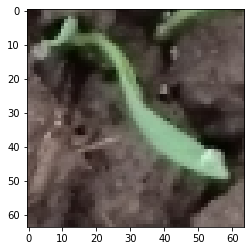

In [8]:
pyplot.imshow((X[0]).astype(np.uint8))
pyplot.show()

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1.0/7, stratify=y, shuffle=True, random_state=42)


_____

# Basic Transfer Learning

In [10]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications import VGG16

In [12]:
vgg_model_base = Model(vgg_model_raw.input, vgg_model_raw.layers[-13].output)
vgg_model_base.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [13]:
# prepare for transfer learning
for layer in vgg_model_base.layers:
    layer.trainable = False

## Classification Network

### Try adding only [Flatten, Softmax] layers

In [14]:
x = vgg_model_base.layers[-1].output
predictions = Flatten()(x)
predictions = Dense(5, activation='softmax')(predictions)

vgg_model_class = Model(inputs=vgg_model_base.input, outputs=predictions) 
vgg_model_class.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [15]:
model_trained_class, history_trained_class = compile_train_vgg (vgg_model_class, X_train, y_train, X_val, y_val, batchSize=128, nEpochs=8, loss='sparse_categorical_crossentropy')

Epoch 1/8
7/7 [==============================] - 5s 491ms/step - loss: 1377211.2963 - accuracy: 0.2184 - val_loss: 4096851.5000 - val_accuracy: 0.1938
Epoch 2/8
7/7 [==============================] - 3s 435ms/step - loss: 3457207.5625 - accuracy: 0.1904 - val_loss: 3014003.7500 - val_accuracy: 0.2016
Epoch 3/8
7/7 [==============================] - 3s 424ms/step - loss: 2480389.6875 - accuracy: 0.2147 - val_loss: 3180307.2500 - val_accuracy: 0.1938
Epoch 4/8
7/7 [==============================] - 3s 453ms/step - loss: 2573151.3750 - accuracy: 0.2139 - val_loss: 4641563.5000 - val_accuracy: 0.1938
Epoch 5/8
7/7 [==============================] - 3s 463ms/step - loss: 2093420.1250 - accuracy: 0.3067 - val_loss: 4695679.0000 - val_accuracy: 0.2016
Epoch 6/8
7/7 [==============================] - 3s 468ms/step - loss: 2523746.6875 - accuracy: 0.2603 - val_loss: 2920779.2500 - val_accuracy: 0.2481
Epoch 7/8
7/7 [==============================] - 3s 458ms/step - loss: 1791162.7031 - accuracy

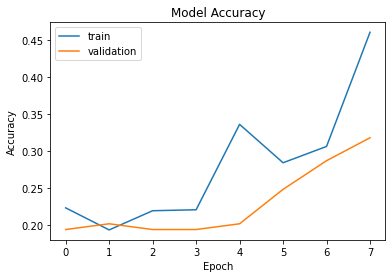

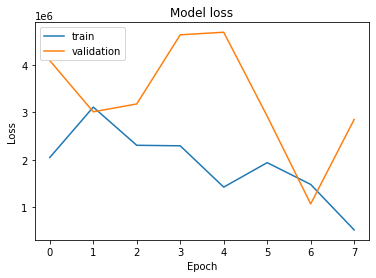

In [16]:
plot_learning_curves(history_trained_class)

Confusion matrix: 
[[ 69  14   0  71   0]
 [  1  83   0  71   0]
 [  3  20   0 131   0]
 [  0   2   0 152   0]
 [  1   7   0 146   0]]


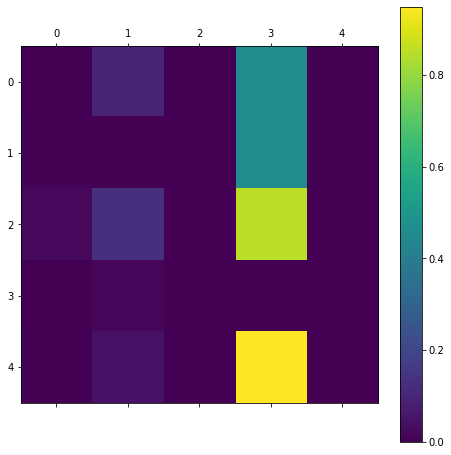

array([[ 69,  14,   0,  71,   0],
       [  1,  83,   0,  71,   0],
       [  3,  20,   0, 131,   0],
       [  0,   2,   0, 152,   0],
       [  1,   7,   0, 146,   0]])

In [151]:
calc_plot_confusion_matrix(model_trained_class, X_train, y_train)

Confusion matrix: 
[[ 9  3  0 14  0]
 [ 0  8  0 17  0]
 [ 1  3  0 22  0]
 [ 0  2  0 24  0]
 [ 0  4  0 22  0]]


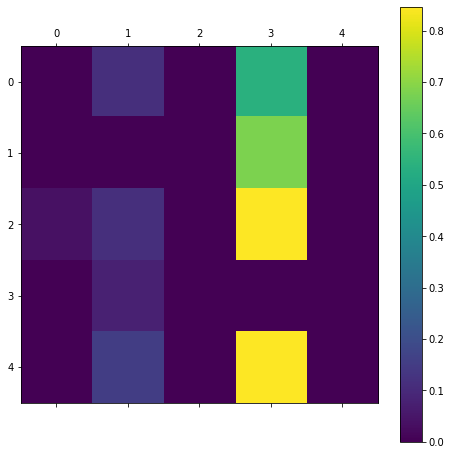

In [17]:
calc_plot_confusion_matrix(model_trained_class, X_val, y_val)

Confusion matrix: 
[[ 7  4  0  9  0]
 [ 1  5  0 14  0]
 [ 0  3  0 17  0]
 [ 0  1  0 19  0]
 [ 0  2  0 18  0]]


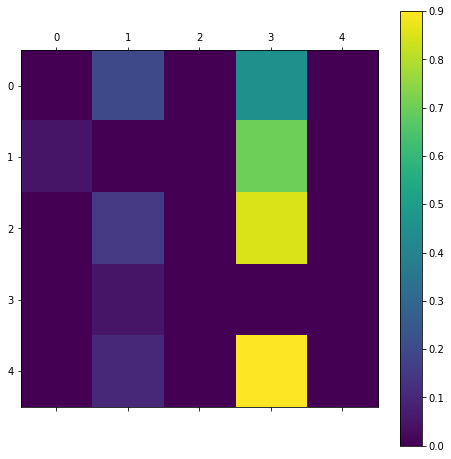

In [18]:
calc_plot_confusion_matrix(model_trained_class, X_test, y_test)

### Try adding [FC, Flatten, Softmax, FC] layers

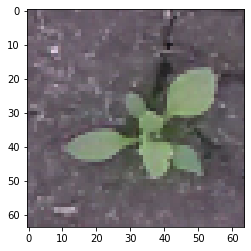

In [19]:
pyplot.imshow((X_train[0]).astype(np.uint8))
pyplot.show()

In [20]:
x = vgg_model_base.layers[-1].output

predictions = Dense(64, activation = 'sigmoid')(x)
predictions = Flatten()(predictions)
predictions = Dense(32, activation = 'sigmoid')(predictions)
predictions = Dense(5, activation='softmax')(predictions)

vgg_model_class2 = Model(inputs=vgg_model_base.input, outputs=predictions) 
vgg_model_class2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [21]:
model_trained_class2, history_trained_class2 = compile_train_vgg (vgg_model_class2, X_train, y_train, X_val, y_val, batchSize=128, nEpochs=32, loss='sparse_categorical_crossentropy')

Epoch 1/32
7/7 [==============================] - 4s 493ms/step - loss: 1.8531 - accuracy: 0.2004 - val_loss: 1.7537 - val_accuracy: 0.1783
Epoch 2/32
7/7 [==============================] - 3s 459ms/step - loss: 1.7293 - accuracy: 0.1808 - val_loss: 1.6826 - val_accuracy: 0.2171
Epoch 3/32
7/7 [==============================] - 3s 478ms/step - loss: 1.6917 - accuracy: 0.1574 - val_loss: 1.6475 - val_accuracy: 0.1938
Epoch 4/32
7/7 [==============================] - 3s 455ms/step - loss: 1.6475 - accuracy: 0.1569 - val_loss: 1.6162 - val_accuracy: 0.1938
Epoch 5/32
7/7 [==============================] - 3s 468ms/step - loss: 1.6247 - accuracy: 0.1769 - val_loss: 1.6150 - val_accuracy: 0.2248
Epoch 6/32
7/7 [==============================] - 3s 456ms/step - loss: 1.6145 - accuracy: 0.1976 - val_loss: 1.6157 - val_accuracy: 0.2171
Epoch 7/32
7/7 [==============================] - 3s 463ms/step - loss: 1.6134 - accuracy: 0.2148 - val_loss: 1.6123 - val_accuracy: 0.2326
Epoch 8/32
7/7 [====

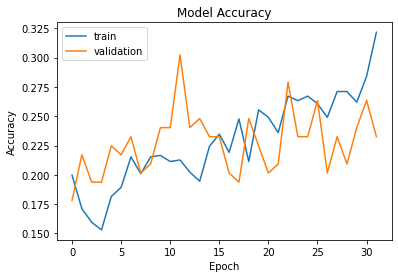

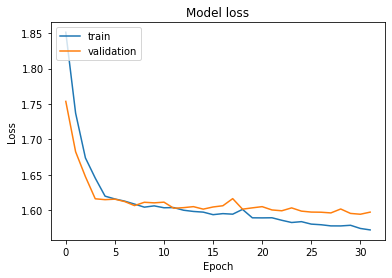

In [22]:
plot_learning_curves(history_trained_class2)

Confusion matrix: 
[[24 70 38  7 15]
 [ 7 87 50  8  3]
 [ 6 59 80  4  5]
 [ 4 61 55 23 11]
 [ 7 60 61 14 12]]


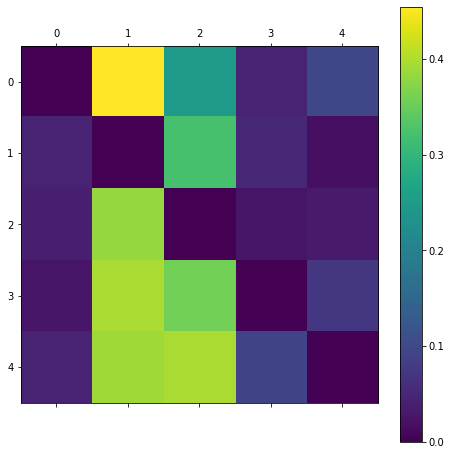

array([[24, 70, 38,  7, 15],
       [ 7, 87, 50,  8,  3],
       [ 6, 59, 80,  4,  5],
       [ 4, 61, 55, 23, 11],
       [ 7, 60, 61, 14, 12]])

In [152]:
calc_plot_confusion_matrix(model_trained_class2, X_train, y_train)

Confusion matrix: 
[[ 1 14  7  3  1]
 [ 1 11 13  0  0]
 [ 0  8 15  2  1]
 [ 1 13  8  3  1]
 [ 2 10 11  3  0]]


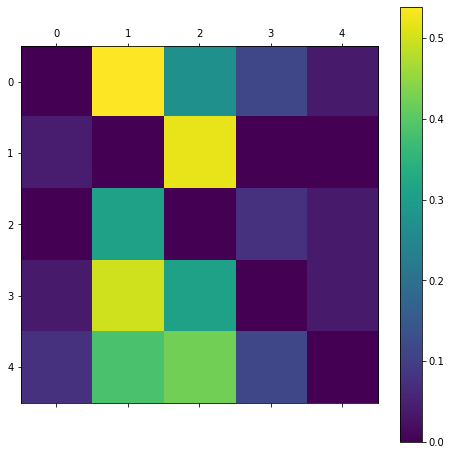

array([[ 1, 14,  7,  3,  1],
       [ 1, 11, 13,  0,  0],
       [ 0,  8, 15,  2,  1],
       [ 1, 13,  8,  3,  1],
       [ 2, 10, 11,  3,  0]])

In [138]:
calc_plot_confusion_matrix(model_trained_class2, X_val, y_val)

Confusion matrix: 
[[ 4 10  3  1  2]
 [ 3 11  5  1  0]
 [ 1  8  5  4  2]
 [ 1  7 10  2  0]
 [ 1  6  6  5  2]]


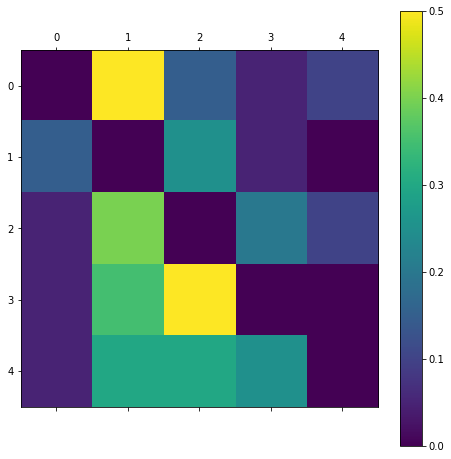

In [139]:
class2_conf_mat_test = calc_plot_confusion_matrix(model_trained_class2, X_test, y_test)

In [140]:
t0p0, t0p1, t0p2, t0p3, t0p4, t1p0, t1p1, t1p2, t1p3, t1p4, t2p0, t2p1, t2p2, t2p3, t2p4, t3p0, t3p1, t3p2, t3p3, t3p4, t4p0, t4p1, t4p2, t4p3, t4p4 =class2_conf_mat_test.ravel()
Accuracy = (t0p0+t1p1+t2p2+t3p3+t4p4)/ (t0p0+t0p1+t0p2+t0p3+t0p4+t1p0+t1p1+t1p2+t1p3+t1p4+t2p0+t2p1+t2p2+t2p3+t2p4+t3p0+t3p1+t3p2+t3p3+t3p4+t4p0+t4p1+t4p2+t4p3+t4p4)
print(f"Overall accuracy: {Accuracy:.3f}")

Overall accuracy: 0.240


_____________

## Regression Network

In [40]:
unique, counts = np.unique(y, return_counts=True)
np.asarray((unique, counts)).T  

array([[  0., 180.],
       [  1., 180.],
       [  2., 180.],
       [  3., 180.],
       [  4., 180.]])

In [41]:
y_reg = y.copy()
for i in range(0,y.shape[0]-180):
    y_reg[i]+=1
for i in range(1,181):
    y_reg[-i]+=2
unique, counts = np.unique(y_reg, return_counts=True)
np.asarray((unique, counts)).T  
    

array([[  1., 180.],
       [  2., 180.],
       [  3., 180.],
       [  4., 180.],
       [  6., 180.]])

In [42]:
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X, y_reg, test_size=1.0/7, stratify=y_reg, shuffle=True, random_state=42)

In [43]:
vgg_model_base.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [86]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import LeakyReLU
def relu_advanced(x):
    return K.relu(x, max_value=6)


In [90]:
x = vgg_model_base.layers[-1].output

predictions = Dense(32, activation = 'sigmoid')(x)
predictions = Flatten()(predictions)
predictions = Dense(32, activation = 'sigmoid')(predictions)
# predictions = Dense(1, activation=relu_advanced)(predictions)
predictions = LeakyReLU(1) (predictions)
predictions = Dense(1, activation=relu_advanced)(predictions)
vgg_model_reg = Model(inputs=vgg_model_base.input, outputs=predictions) 
vgg_model_reg.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0  

In [91]:
model_trained_reg, history_trained_reg = compile_train_vgg (
    vgg_model_reg, X_train_reg, y_train_reg, X_val_reg, y_val_reg, batchSize=64, nEpochs=16,
    loss='mean_squared_error', metrics=['mean_squared_error'])

Epoch 1/16
13/13 [==============================] - 5s 353ms/step - loss: 5.6240 - mean_squared_error: 5.6240 - val_loss: 2.9109 - val_mean_squared_error: 2.9109
Epoch 2/16
13/13 [==============================] - 5s 353ms/step - loss: 2.9773 - mean_squared_error: 2.9773 - val_loss: 2.8989 - val_mean_squared_error: 2.8989
Epoch 3/16
13/13 [==============================] - 4s 339ms/step - loss: 2.7594 - mean_squared_error: 2.7594 - val_loss: 2.8899 - val_mean_squared_error: 2.8899
Epoch 4/16
13/13 [==============================] - 4s 339ms/step - loss: 2.9350 - mean_squared_error: 2.9350 - val_loss: 2.8865 - val_mean_squared_error: 2.8865
Epoch 5/16
13/13 [==============================] - 5s 357ms/step - loss: 2.9155 - mean_squared_error: 2.9155 - val_loss: 2.8747 - val_mean_squared_error: 2.8747
Epoch 6/16
13/13 [==============================] - 4s 334ms/step - loss: 2.8588 - mean_squared_error: 2.8588 - val_loss: 2.9397 - val_mean_squared_error: 2.9397
Epoch 7/16
13/13 [==========

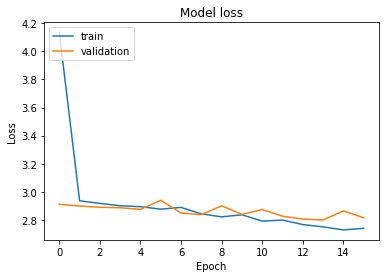

In [92]:
plt.plot(history_trained_reg.history['loss'])
plt.plot(history_trained_reg.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [93]:
y_val_predict = model_trained_reg.predict(X_val_reg)
print(X_val.shape, y_val_predict.squeeze().shape)
y_val_predict = y_val_predict.squeeze()
# y_predict

(129, 64, 64, 3) (129,)


In [94]:
# map the predicted regression values to one of these values [1,2,3,4,6]
from scipy.interpolate import interp1d
m = interp1d([y_val_predict.min(), y_val_predict.max()],[1,6])
y_val_predict_mapped = m(y_val_predict)

y_val_predict_rounded = np.round(y_val_predict_mapped)

for i in range(0, len(y_val_predict_rounded)):
    
    if y_val_predict_rounded[i] > 5.5 and y_val_predict_rounded[i] <6 :
        y_val_predict_rounded[i] = 6
    if y_val_predict_rounded[i] > 5 and y_val_predict_rounded[i] < 5.5 :
        y_val_predict_rounded[i] = 4
    if y_val_predict_rounded[i] == 5:
        y_val_predict_rounded[i] = 4

        
unique, counts = np.unique(y_val_predict_rounded, return_counts=True)
np.asarray((unique, counts)).T  

array([[ 1.,  1.],
       [ 2.,  7.],
       [ 3., 37.],
       [ 4., 76.],
       [ 6.,  8.]])

Confusion matrix: 
[[ 1  5 12  8  0]
 [ 0  2  5 16  2]
 [ 0  0 13 12  1]
 [ 0  0  6 16  4]
 [ 0  0  1 24  1]]


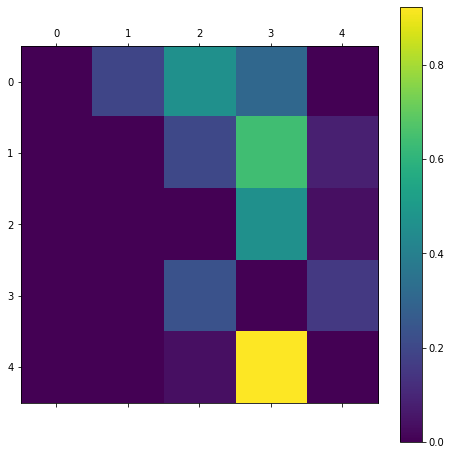

In [95]:
conf_mx = confusion_matrix(y_val_reg, y_val_predict_rounded)
print('Confusion matrix: \n{0}'.format(conf_mx))
    
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

In [96]:
y_test_predict = model_trained_reg.predict(X_test)
print(X_test.shape, y_test_predict.squeeze().shape)
y_test_predict = y_test_predict.squeeze()

(100, 64, 64, 3) (100,)


In [97]:
# map the predicted regression values to one of these values [1,2,3,4,6]
m = interp1d([y_test_predict.min(), y_test_predict.max()],[1,6])
y_test_predict_mapped = m(y_test_predict)

y_test_predict_rounded = np.round(y_test_predict_mapped)

for i in range(0, len(y_test_predict_rounded)):
    
    if y_test_predict_rounded[i] > 5.5 and y_test_predict_rounded[i] <6 :
        y_test_predict_rounded[i] = 6
    if y_test_predict_rounded[i] > 5 and y_test_predict_rounded[i] < 5.5 :
        y_test_predict_rounded[i] = 4
    if y_test_predict_rounded[i] == 5:
        y_test_predict_rounded[i] = 4

        
unique, counts = np.unique(y_test_predict_rounded, return_counts=True)
np.asarray((unique, counts)).T 

array([[ 1.,  2.],
       [ 2.,  9.],
       [ 3., 40.],
       [ 4., 48.],
       [ 6.,  1.]])

In [98]:
unique, counts = np.unique(y_test, return_counts=True)
np.asarray((unique, counts)).T 

array([[ 0., 20.],
       [ 1., 20.],
       [ 2., 20.],
       [ 3., 20.],
       [ 4., 20.]])

In [99]:
y_test_reg = y_test.copy()
for i in range(0,y_test.shape[0]-20):
    y_test_reg[i]+=1
for i in range(1,21):
    y_test_reg[-i]+=2
unique, counts = np.unique(y_test_reg, return_counts=True)
np.asarray((unique, counts)).T  
   

array([[ 1., 20.],
       [ 2., 20.],
       [ 3., 20.],
       [ 4., 20.],
       [ 6., 20.]])

Confusion matrix: 
[[ 1  4 11  4  0]
 [ 1  3 10  6  0]
 [ 0  1  7 12  0]
 [ 0  0  8 11  1]
 [ 0  1  4 15  0]]


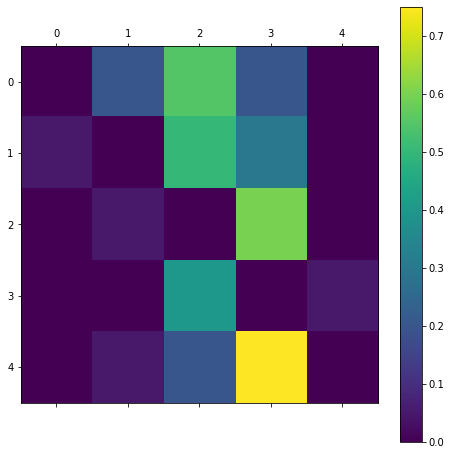

In [100]:
conf_mx = confusion_matrix(y_test_reg, y_test_predict_rounded)
print('Confusion matrix: \n{0}'.format(conf_mx))
    
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

## Discussion
#### The size of the training data is quite small. Discuss based on your learning curves if overfitting is occurring with your networks in Classification and Regression.

    By looking at the learning curves of our classification network, we can see that the train accuracy is higher than the validation accuracy. Moreover, the test accuracy is also lower than the train accuracy. This is a sign of overfitting. In general, the accuracies scores are small, this could be due to the small dataset or the model not being complex enough to capture all the details.
    We can see the same thing by looking at the Regression loss curves: The validation loss is higher than the train loss which in the same sense is also a sign of overfitting.
    
    To overcome the overfitting proplem we need to apply regularization to the model i.e. increase the model ability to generalize the prediction by regularization methods like BatchNormalization or Dropout layers or a mix of many others. This will help the model not to memorize the provided small dataset to be able to generalize easier.
    
    Keep in mind that I preserved the train and validation sets so that we can compare them to the following modified models.

_____________

## Regularization
### Picked classification : 
    model_trained_class2

In [63]:
# make sure data is still intact
X.shape, y.shape, X_test.shape, y_test.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((900, 64, 64, 3),
 (900,),
 (100, 64, 64, 3),
 (100,),
 (771, 64, 64, 3),
 (771,),
 (129, 64, 64, 3),
 (129,))

In [230]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1.0/7, stratify=y, shuffle=True, random_state=42)

In [64]:
vgg_model_base.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

#### Try adding dropout layers + batch normalization layers

In [130]:
x = vgg_model_base.layers[-1].output

predictions=BatchNormalization()(x)
predictions = Dropout(0.5)(predictions)

predictions = Dense(64, activation = 'sigmoid')(predictions)

predictions=BatchNormalization()(predictions)
predictions = Dropout(0.5)(predictions)

predictions = Flatten()(predictions)

predictions=BatchNormalization()(predictions)
predictions = Dropout(0.5)(predictions)

predictions = Dense(32, activation = 'sigmoid')(predictions)

predictions=BatchNormalization()(predictions)
predictions = Dropout(0.5)(predictions)

predictions = Dense(5, activation='softmax')(predictions)

vgg_model_class_regu = Model(inputs=vgg_model_base.input, outputs=predictions) 
vgg_model_class_regu.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0  

In [131]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1.0/7, stratify=y, shuffle=True, random_state=42)

In [134]:
trained_class_regu, history_trained_class_regu = compile_train_vgg (vgg_model_class_regu, X_train, y_train, X_val, y_val, batchSize=128, nEpochs=32, loss='sparse_categorical_crossentropy')

Epoch 1/32
7/7 [==============================] - 6s 753ms/step - loss: 2.3424 - accuracy: 0.2355 - val_loss: 1.5528 - val_accuracy: 0.3023
Epoch 2/32
7/7 [==============================] - 5s 617ms/step - loss: 2.3687 - accuracy: 0.2216 - val_loss: 1.5489 - val_accuracy: 0.3023
Epoch 3/32
7/7 [==============================] - 4s 654ms/step - loss: 2.2286 - accuracy: 0.2562 - val_loss: 1.5402 - val_accuracy: 0.3023
Epoch 4/32
7/7 [==============================] - 5s 739ms/step - loss: 2.3085 - accuracy: 0.2320 - val_loss: 1.5345 - val_accuracy: 0.2946
Epoch 5/32
7/7 [==============================] - 4s 599ms/step - loss: 2.2655 - accuracy: 0.2527 - val_loss: 1.5287 - val_accuracy: 0.3101
Epoch 6/32
7/7 [==============================] - 4s 599ms/step - loss: 2.2223 - accuracy: 0.2612 - val_loss: 1.5235 - val_accuracy: 0.3023
Epoch 7/32
7/7 [==============================] - 4s 595ms/step - loss: 2.2164 - accuracy: 0.2671 - val_loss: 1.5163 - val_accuracy: 0.3101
Epoch 8/32
7/7 [====

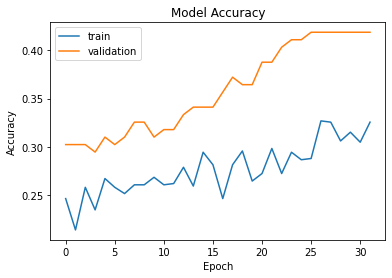

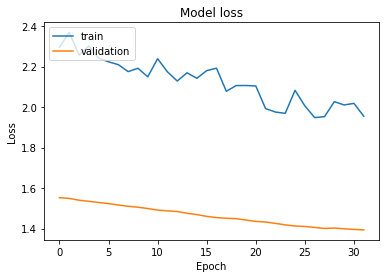

In [135]:
plot_learning_curves(history_trained_class_regu)

Confusion matrix: 
[[144   4   4   1   1]
 [ 22 117   2   9   5]
 [ 19  14  93  15  13]
 [  6   4   4 131   9]
 [  5   4   4  21 120]]


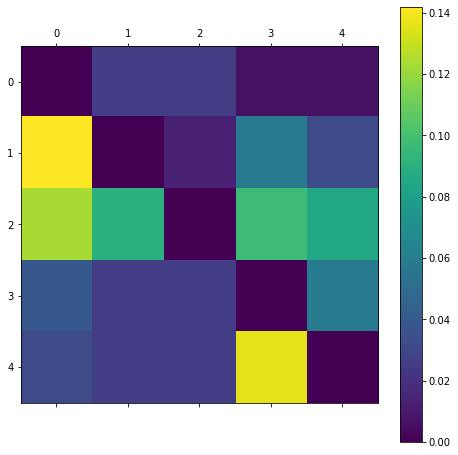

array([[144,   4,   4,   1,   1],
       [ 22, 117,   2,   9,   5],
       [ 19,  14,  93,  15,  13],
       [  6,   4,   4, 131,   9],
       [  5,   4,   4,  21, 120]])

In [153]:
calc_plot_confusion_matrix(trained_class_regu, X_train, y_train)

Confusion matrix: 
[[19  2  3  2  0]
 [ 8  7  5  3  2]
 [ 8  7  5  2  4]
 [ 1  1  7 15  2]
 [ 5  5  4  4  8]]


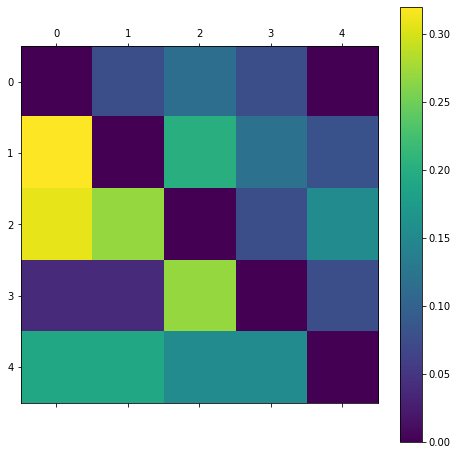

array([[19,  2,  3,  2,  0],
       [ 8,  7,  5,  3,  2],
       [ 8,  7,  5,  2,  4],
       [ 1,  1,  7, 15,  2],
       [ 5,  5,  4,  4,  8]])

In [141]:
calc_plot_confusion_matrix(trained_class_regu, X_val, y_val)

Confusion matrix: 
[[12  4  3  0  1]
 [10  4  4  1  1]
 [ 4  6  5  4  1]
 [ 2  2  2  6  8]
 [ 1  3  2  4 10]]


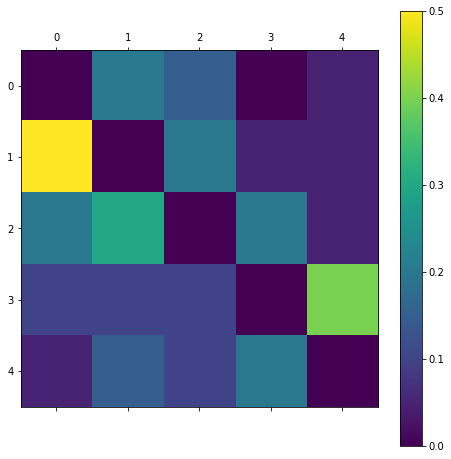

In [142]:
class_regu_test_conv_mat =calc_plot_confusion_matrix(trained_class_regu, X_test, y_test)

In [143]:
t0p0, t0p1, t0p2, t0p3, t0p4, t1p0, t1p1, t1p2, t1p3, t1p4, t2p0, t2p1, t2p2, t2p3, t2p4, t3p0, t3p1, t3p2, t3p3, t3p4, t4p0, t4p1, t4p2, t4p3, t4p4 =class_regu_test_conv_mat.ravel()
Accuracy = (t0p0+t1p1+t2p2+t3p3+t4p4)/ (t0p0+t0p1+t0p2+t0p3+t0p4+t1p0+t1p1+t1p2+t1p3+t1p4+t2p0+t2p1+t2p2+t2p3+t2p4+t3p0+t3p1+t3p2+t3p3+t3p4+t4p0+t4p1+t4p2+t4p3+t4p4)
print(f"Overall accuracy: {Accuracy:.3f}")

Overall accuracy: 0.370


______________

## Data Augmentation
### Work on last step's model: 
    trained_class_regu

In [144]:
# again just make sure the data is intact
X.shape, y.shape, X_test.shape, y_test.shape

((900, 64, 64, 3), (900,), (100, 64, 64, 3), (100,))

In [145]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1.0/7, stratify=y, shuffle=True, random_state=42)

In [146]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create data generator
datagen = ImageDataGenerator()
# create iterator
it = datagen.flow(X_train, y_train, batch_size=32)
# define model
trained_class_regu_aug = trained_class_regu
# fit model on the augmented dataset

trained_class_regu_aug_history = trained_class_regu_aug.fit(it, batch_size=32, epochs=32 , validation_data=(X_val, y_val))

Epoch 1/32
25/25 [==============================] - 8s 313ms/step - loss: 2.0147 - accuracy: 0.2918 - val_loss: 1.3843 - val_accuracy: 0.4031
Epoch 2/32
25/25 [==============================] - 8s 310ms/step - loss: 2.0346 - accuracy: 0.2983 - val_loss: 1.3777 - val_accuracy: 0.4264
Epoch 3/32
25/25 [==============================] - 8s 325ms/step - loss: 2.0360 - accuracy: 0.3191 - val_loss: 1.3777 - val_accuracy: 0.4186
Epoch 4/32
25/25 [==============================] - 8s 338ms/step - loss: 1.8798 - accuracy: 0.3178 - val_loss: 1.3772 - val_accuracy: 0.4341
Epoch 5/32
25/25 [==============================] - 8s 332ms/step - loss: 1.8643 - accuracy: 0.3113 - val_loss: 1.3699 - val_accuracy: 0.4419
Epoch 6/32
25/25 [==============================] - 8s 337ms/step - loss: 1.8837 - accuracy: 0.2970 - val_loss: 1.3579 - val_accuracy: 0.4419
Epoch 7/32
25/25 [==============================] - 10s 387ms/step - loss: 1.8611 - accuracy: 0.3489 - val_loss: 1.3505 - val_accuracy: 0.4574
Epoch

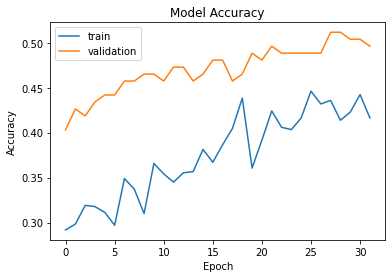

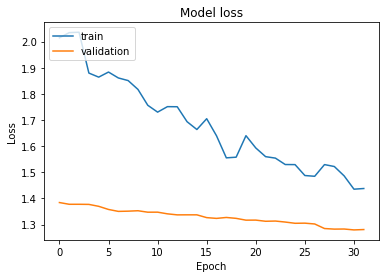

In [147]:
plot_learning_curves(trained_class_regu_aug_history)

Confusion matrix: 
[[144   4   4   1   1]
 [ 22 117   2   9   5]
 [ 19  14  93  15  13]
 [  6   4   4 131   9]
 [  5   4   4  21 120]]


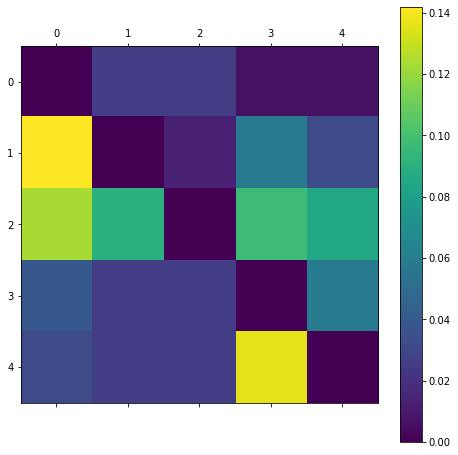

array([[144,   4,   4,   1,   1],
       [ 22, 117,   2,   9,   5],
       [ 19,  14,  93,  15,  13],
       [  6,   4,   4, 131,   9],
       [  5,   4,   4,  21, 120]])

In [154]:
calc_plot_confusion_matrix(trained_class_regu_aug, X_train, y_train)

Confusion matrix: 
[[20  0  2  2  2]
 [ 7  9  5  3  1]
 [ 6  7  5  5  3]
 [ 1  1  3 18  3]
 [ 2  4  3  5 12]]


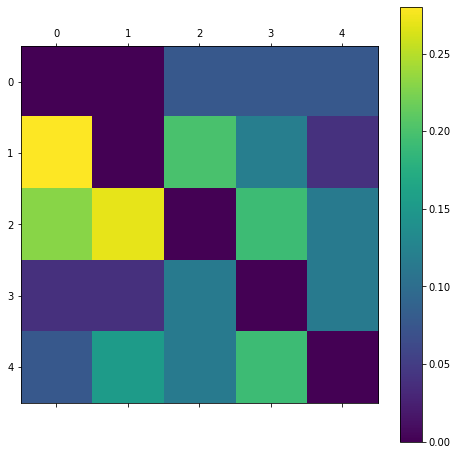

array([[20,  0,  2,  2,  2],
       [ 7,  9,  5,  3,  1],
       [ 6,  7,  5,  5,  3],
       [ 1,  1,  3, 18,  3],
       [ 2,  4,  3,  5, 12]])

In [148]:
calc_plot_confusion_matrix(trained_class_regu_aug, X_val, y_val)

Confusion matrix: 
[[11  4  3  0  2]
 [ 9  6  4  1  0]
 [ 5  5  5  3  2]
 [ 2  1  3  7  7]
 [ 1  3  1  2 13]]


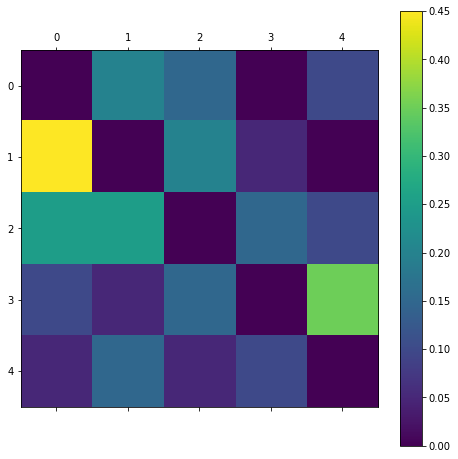

In [149]:
class_regu_aug_conv_mat = calc_plot_confusion_matrix(trained_class_regu_aug, X_test, y_test)

In [150]:
t0p0, t0p1, t0p2, t0p3, t0p4, t1p0, t1p1, t1p2, t1p3, t1p4, t2p0, t2p1, t2p2, t2p3, t2p4, t3p0, t3p1, t3p2, t3p3, t3p4, t4p0, t4p1, t4p2, t4p3, t4p4 =class_regu_aug_conv_mat.ravel()
Accuracy = (t0p0+t1p1+t2p2+t3p3+t4p4)/ (t0p0+t0p1+t0p2+t0p3+t0p4+t1p0+t1p1+t1p2+t1p3+t1p4+t2p0+t2p1+t2p2+t2p3+t2p4+t3p0+t3p1+t3p2+t3p3+t3p4+t4p0+t4p1+t4p2+t4p3+t4p4)
print(f"Overall accuracy: {Accuracy:.3f}")

Overall accuracy: 0.420


## Discussion
#### Discuss based on your learning curves and final metrics in Regularization and in Augmentation, how large a improvement can be observed from regularization and data augmentation.

    By looking at the train and validation learning curves, the confusion matrix and also the　overall test accuracy score (test: 0.37 ---> 0.42) we can clearly see the improvement in the metrics.
    In the regularization step, we notice that the gap between the train and validation loss or accuracy (10% difference) is not small, but when we applied the simple augmentation step, we notice that this gap decreases(7%), not just that but the overall accuracy increased as well. This is a proof of the importance of increasing the number of trainset by augmentation which increases the model's ability to generalize and capture the details in a better manner.
    I assume we can further improve these results by increasing the dataset, the data augmentation and making a balance between the model complexity increase (because of the low accuracy comparing to our application target accuracy) and the regularization (to avoid any possible overfit).